In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score

# Create a dummy dataset
np.random.seed(42)
data = {
    'similarity_scores_1': np.random.randint(0, 101, 1000),
    'similarity_scores_2': np.random.randint(0, 101, 1000),
}
df = pd.DataFrame(data)

# Assign ground truth labels based on a predetermined cutoff point (70 for both columns)
df['ground_truth'] = (df['similarity_scores_1'] > 70) & (df['similarity_scores_2'] > 70)

# Define a function to calculate the F1 score
def calculate_f1_score(df, cutoff_1, cutoff_2):
    df['predicted'] = (df['similarity_scores_1'] > cutoff_1) & (df['similarity_scores_2'] > cutoff_2)
    f1 = f1_score(df['ground_truth'], df['predicted'])
    return f1

# Initialize variables for tracking the best cutoff points and the highest F1 score
best_cutoff_1 = None
best_cutoff_2 = None
highest_f1 = 0

# Iterate through different cutoff values for both similarity_score_1 and similarity_score_2
for cutoff_1 in range(0, 101, 5):
    for cutoff_2 in range(0, 101, 5):
        f1 = calculate_f1_score(df, cutoff_1, cutoff_2)
        if f1 > highest_f1:
            best_cutoff_1 = cutoff_1
            best_cutoff_2 = cutoff_2
            highest_f1 = f1

print("Best cutoff points: similarity_score_1 =", best_cutoff_1, "similarity_score_2 =", best_cutoff_2)


Best cutoff points: similarity_score_1 = 70 similarity_score_2 = 70


In [2]:
df

,similarity_scores_1,similarity_scores_2,ground_truth,predicted
0,51,56,False,False
1,92,16,False,False
2,14,85,False,False
3,71,89,True,False
4,60,43,False,False
...,...,...,...,...
995,88,99,True,False
996,100,8,False,False
997,27,37,False,False
998,73,47,False,False


In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Create a dummy dataset
np.random.seed(42)
data = {
    'similarity_scores_1': np.random.randint(0, 101, 1000),
    'similarity_scores_2': np.random.randint(0, 101, 1000),
}
df = pd.DataFrame(data)

# Normalize the similarity scores
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)

# Cluster the data using K-means algorithm with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(normalized_data)

# Find the centroids of the clusters
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Identify the optimal cutoff points by inspecting the centroids
cutoff_1 = (centroids[0, 0] + centroids[1, 0]) / 2
cutoff_2 = (centroids[0, 1] + centroids[1, 1]) / 2

print("Optimal cutoff points: similarity_score_1 =", cutoff_1, "similarity_score_2 =", cutoff_2)


Optimal cutoff points: similarity_score_1 = 49.42414965986395 similarity_score_2 = 49.674949979992


In C:\Users\sigar\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\sigar\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\sigar\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\sigar\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\sigar\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

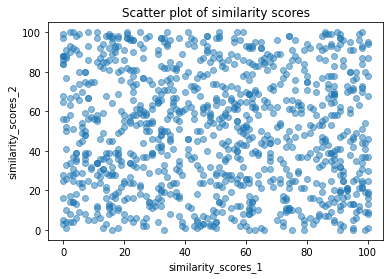

In [4]:
import matplotlib.pyplot as plt

plt.scatter(df['similarity_scores_1'], df['similarity_scores_2'], alpha=0.5)
plt.xlabel('similarity_scores_1')
plt.ylabel('similarity_scores_2')
plt.title('Scatter plot of similarity scores')
plt.show()


In [5]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform

# Create a dummy dataset
np.random.seed(42)
data = {
    'similarity_scores_1': np.random.randint(0, 101, 1000),
    'similarity_scores_2': np.random.randint(0, 101, 1000),
}
df = pd.DataFrame(data)

# Compute pairwise Euclidean distances
distances = squareform(pdist(df, metric='euclidean'))

# Initialize variables for tracking the best cutoff points and the lowest ratio
best_cutoff_1 = None
best_cutoff_2 = None
lowest_ratio = float('inf')

# Iterate through different cutoff values for both similarity_score_1 and similarity_score_2
for cutoff_1 in range(0, 101, 5):
    for cutoff_2 in range(0, 101, 5):
        
        within_group_distances = distances[(df['similarity_scores_1'] > cutoff_1) & (df['similarity_scores_2'] > cutoff_2)]
        between_group_distances = distances[~((df['similarity_scores_1'] > cutoff_1) & (df['similarity_scores_2'] > cutoff_2))]
        
        if len(within_group_distances) > 0 and len(between_group_distances) > 0:
            within_group_mean = np.mean(within_group_distances)
            between_group_mean = np.mean(between_group_distances)

            ratio = within_group_mean / between_group_mean

            if ratio < lowest_ratio:
                best_cutoff_1 = cutoff_1
                best_cutoff_2 = cutoff_2
                lowest_ratio = ratio

print("Best cutoff points: similarity_score_1 =", best_cutoff_1, "similarity_score_2 =", best_cutoff_2)


Best cutoff points: similarity_score_1 = 0 similarity_score_2 = 0


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

# Create a dummy dataset
np.random.seed(42)
data = {
    'similarity_scores_1': np.random.randint(0, 101, 1000),
    'similarity_scores_2': np.random.randint(0, 101, 1000),
}
df = pd.DataFrame(data)

# Normalize the similarity scores
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)

# Initialize variables for tracking the best cutoff points and the highest silhouette score
best_cutoff_1 = None
best_cutoff_2 = None
highest_silhouette = -1

# Iterate through different cutoff values for both similarity_score_1 and similarity_score_2
for cutoff_1 in range(0, 101, 5):
    for cutoff_2 in range(0, 101, 5):
        
        # Cluster the data based on the current cutoff values
        labels = (normalized_data[:, 0] > cutoff_1 / 100) & (normalized_data[:, 1] > cutoff_2 / 100)
        labels = labels.astype(int)
        
        # Check if there are at least two different labels
        if len(np.unique(labels)) > 1:
            # Calculate the silhouette score for the current clustering
            silhouette = silhouette_score(normalized_data, labels)
            
            # Update the best cutoff points and highest silhouette score if needed
            if silhouette > highest_silhouette:
                best_cutoff_1 = cutoff_1
                best_cutoff_2 = cutoff_2
                highest_silhouette = silhouette

print("Best cutoff points: similarity_score_1 =", best_cutoff_1, "similarity_score_2 =", best_cutoff_2)


Best cutoff points: similarity_score_1 = 50 similarity_score_2 = 0
